In [58]:
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download()
from nltk.sentiment.vader import SentimentIntensityAnalyzer

plt.style.use('fivethirtyeight')


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [55]:
#enter in the api tokens keys
consumer_key = "v5S8GCIEXldeBoylI5NxLqFYF"
consumer_secert = "cSVgR4M4FzNFJPb23PWJ4P6UJXj0IIa9Slk441XiAtTRVUBpQP"
access_token = "3084170241-aABwdJwcCioQAJnlaP6E49dojlue7NQtEKfjn16"
access_token_secret = "t3SiZ3KfOS78Y4n0a1gT0DhESJGtnxlyLgse5EKPzA2KE"

auth = tweepy.OAuthHandler(consumer_key,consumer_secert)
#set the access token
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

user = api.me()
print(user.name)

Osob


In [33]:
#get as many a Zendaya's tweets
#her twitter handle os @Zendaya
tweets = []

#get 5 pages of tweets
for page in range(1,5):
    tweets.extend(api.user_timeline(screen_name = "Zendaya", count = 200, page = page))

#getting the number of tweets extracted 
print("Number of tweets extracted: {}. \n".format(len(tweets)))



Number of tweets extracted: 794. 



In [34]:
for tweet in tweets[:5]:
    print(tweet.text)

RT @SpiderManMovie: This, we can confirm. #SpiderManNoWayHome only in movie theaters this Christmas. https://t.co/kCeI8Vgkdm
So excited to announce the new Spider-Man title. So proud of this one...FOS is back! https://t.co/gJJtUr1OFp
Very lucky to be amongst these absolutely brilliant people on this very special 27th Vanity Fair Hollywood Issue. T… https://t.co/CBEUbf4OL0
Happy Valentine’s Day from Marie (if you’re watching our movie tonight with your significant other...we’re sorry lo… https://t.co/nvrJyBiKJr
Happy Valentine’s Day from Marie (If you’re watching our movie tonight with your significant other...we’re sorry lo… https://t.co/EpxLPIR7Mf


In [35]:
#ignoring retweets but instead her own tweets
own_tweets = [tweet for tweet in tweets if tweet.retweeted == False and "RT @" not in tweet.text]
#convert the tweet array into a pandas dataframe
df = pd.DataFrame(data = [[tweet.created_at, tweet.text, len(tweet.text),tweet.id,tweet.favorite_count,tweet.retweet_count] for tweet in own_tweets ],columns = ['Date','Tweet','Length','ID','Likes','Retweets'])

In [36]:
df.head()

,Date,Tweet,Length,ID,Likes,Retweets
0,2021-02-24 00:38:39,So excited to announce the new Spider-Man titl...,108,1364374144444489729,454934,46807
1,2021-02-23 20:38:39,Very lucky to be amongst these absolutely bril...,140,1364313747867783178,71477,5003
2,2021-02-15 02:14:21,Happy Valentine’s Day from Marie (if you’re wa...,140,1361136739247611905,704980,48513
3,2021-02-15 02:04:52,Happy Valentine’s Day from Marie (If you’re wa...,140,1361134351770148865,21056,705
4,2021-02-10 02:59:03,M&amp;M https://t.co/8TNh8qq5Lz,31,1359336045926612992,454342,34576


In [37]:
#can plot frequencies of tweets with a histogram 

df[df['Likes']== df['Likes'].max()]

,Date,Tweet,Length,ID,Likes,Retweets
82,2020-09-08 00:02:38,https://t.co/gmVKyS660w,23,1303121531208257538,2446019,319233


In [38]:
df['Likes'].describe()

count    6.740000e+02
mean     7.879944e+04
std      1.686003e+05
min      1.600000e+02
25%      4.077000e+03
50%      2.277300e+04
75%      8.542175e+04
max      2.446019e+06
Name: Likes, dtype: float64

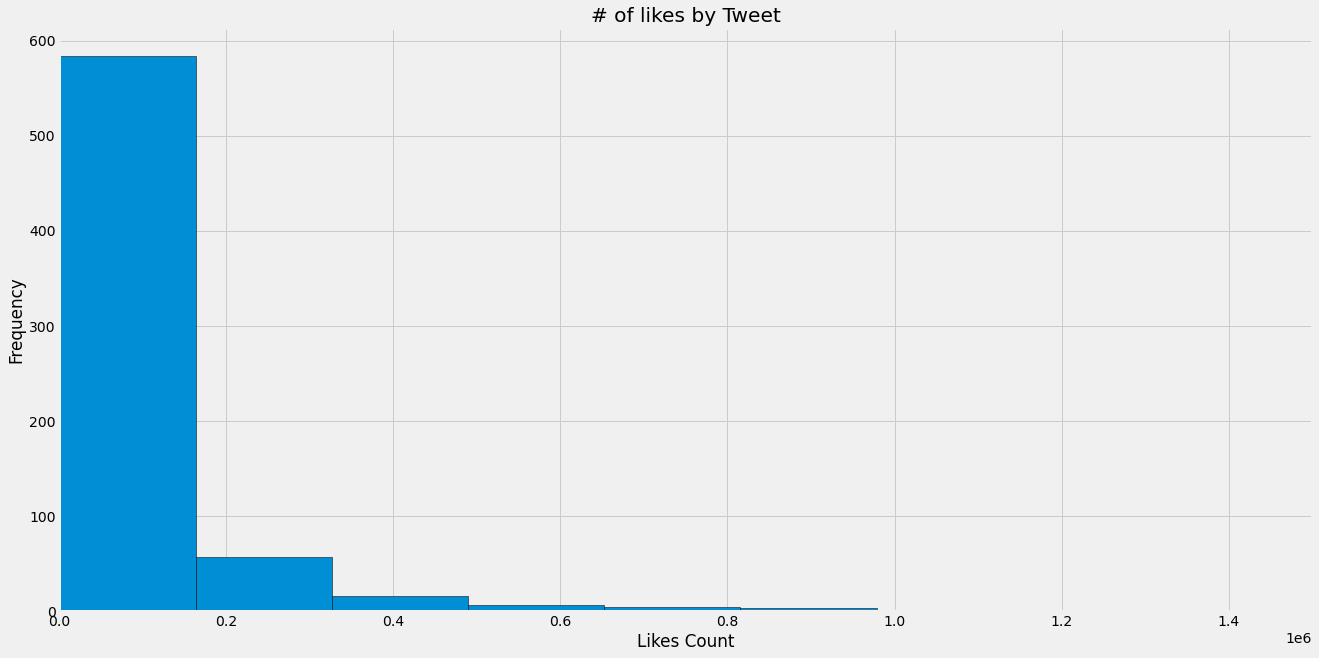

In [50]:
df['Likes'].plot(kind = 'hist', bins = 15, figsize = (20,10),ec = 'black')
plt.xlim(0,1500000)
plt.xlabel('Likes Count')
plt.ylabel('Frequency')
plt.title('# of likes by Tweet')
plt.show()

In [61]:
#sentiment analysis
vader = SentimentIntensityAnalyzer()
#sentence = "today is a beautifal day. I am very happy"
#vader will score how positive or negative a sentence is 

f = lambda tweet: vader.polarity_scores(tweet)['compound']
df['Sentiment'] = df['Tweet'].apply(f)
#change the date to date.time
df['Date'] = pd.to_datetime(df['Date']).dt.date
df.head()

,Date,Tweet,Length,ID,Likes,Retweets,Sentiment
0,2021-02-24,So excited to announce the new Spider-Man titl...,108,1364374144444489729,454934,46807,0.7490
1,2021-02-23,Very lucky to be amongst these absolutely bril...,140,1364313747867783178,71477,5003,0.8838
2,2021-02-15,Happy Valentine’s Day from Marie (if you’re wa...,140,1361136739247611905,704980,48513,0.6369
3,2021-02-15,Happy Valentine’s Day from Marie (If you’re wa...,140,1361134351770148865,21056,705,0.6369
4,2021-02-10,M&amp;M https://t.co/8TNh8qq5Lz,31,1359336045926612992,454342,34576,0.0000


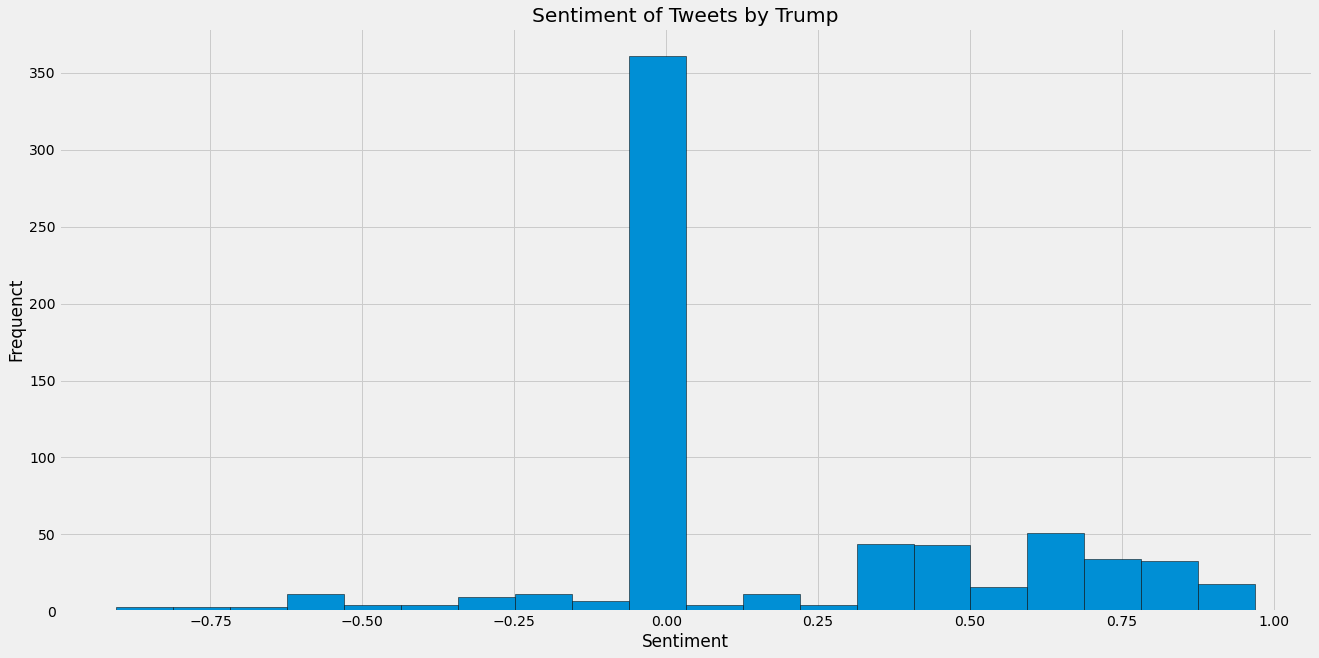

In [65]:
#where do her sentiments like, do a hist
df['Sentiment'].plot(kind = 'hist', bins = 20,figsize = (20,10),ec = 'black')
plt.xlabel('Sentiment')
plt.ylabel('Frequenct')
plt.title('Sentiment of Tweets by Trump')
plt.show()

In [66]:
#group by date 
date_df = df.groupby(['Date']).mean().reset_index()


,Date,Length,ID,Likes,Retweets,Sentiment
0,2018-11-06,32.5,1.059912e+18,31813.5,1670.0,0.00000
1,2018-11-07,51.5,1.060288e+18,313.0,27.0,0.50490
2,2018-11-12,23.0,1.062080e+18,274.5,20.0,0.21075
3,2018-11-13,140.0,1.062206e+18,71310.0,8423.0,-0.19960
4,2018-11-14,82.5,1.062823e+18,6395.5,634.5,0.00000


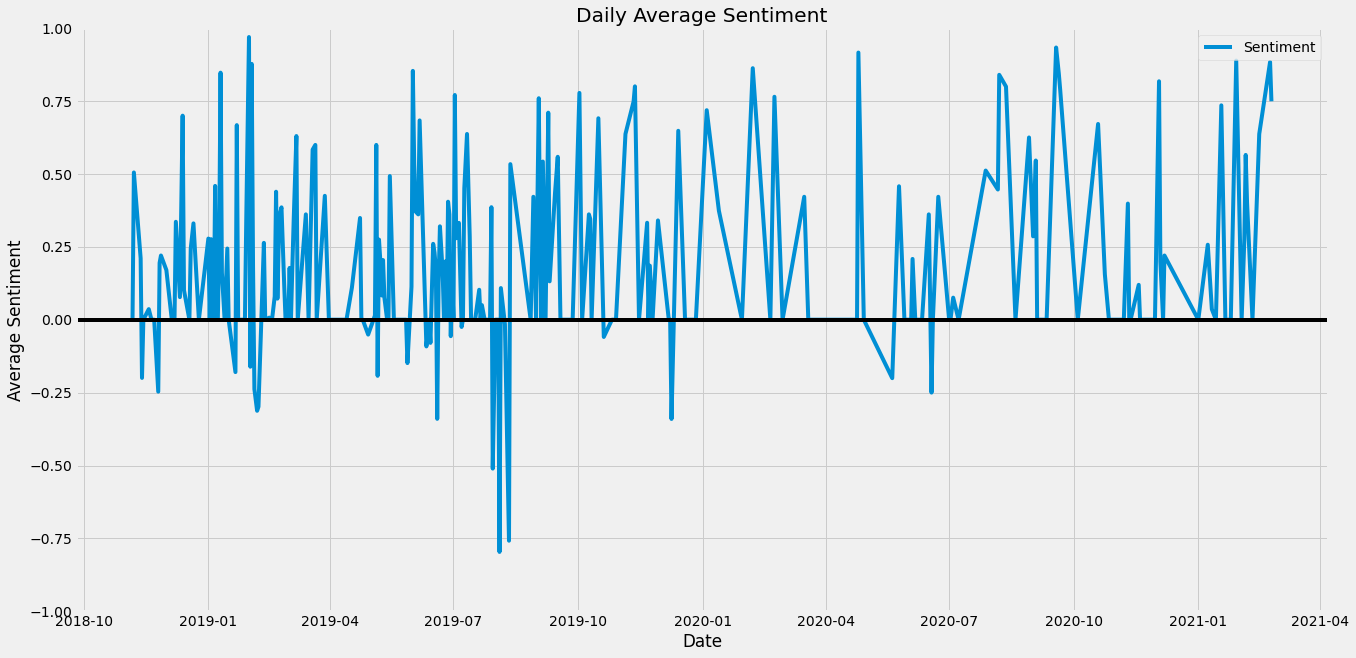

In [70]:
date_df.plot(kind = 'line',  x = 'Date', y = 'Sentiment',figsize = (20,10), ylim= (-1,1))
plt.axhline(y=0,color = 'black') #benchmark for neurtal(zero)
plt.ylabel('Average Sentiment')
plt.title('Daily Average Sentiment')
plt.show()

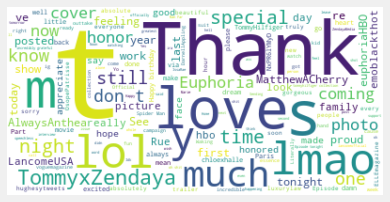

In [72]:
#What are her most common words

from wordcloud import WordCloud, STOPWORDS
#join all of the text together, one giant string
text = " ".join(text for text in df.Tweet)

stopwords = set(STOPWORDS)
stopwords.update(["HTTPS","CO"])
wordcloud = WordCloud(stopwords = stopwords, background_color = "white").generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show() 

In [ ]:
#cool ideas to explore
    # what times does Zendaya tweet
    #correlation between tweetting earlier or later in the day 
    #what are the most common three word groupings
    

